<a href="https://colab.research.google.com/github/amul-dhungel/Learning-Path-of-Zummit-InfoLabs/blob/main/15.0%20AlexNET%20image%20classification/skeleton%20AlexNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About ALexNET
* It is a type of CNN architecture.
* Five Convolution layers.
* Three fully connected layers (Final layer is softmax)
* Dropout feature is added to avoid overfitting in image recognition.
* Data augmentation is basically the making minor changes in original data to increase the training set.

The below figure is the simple flatten architecture of ALexNET. 
* The first contains the convolutional layers 1, which is followed by max pooling.

* The second contains the cvl2 followed by max pooling.
* The third sections contains the 3 cluster of convolution layers which is followed by one max pooling at last.
* Finally, it contains two neural network with softmax at the end.

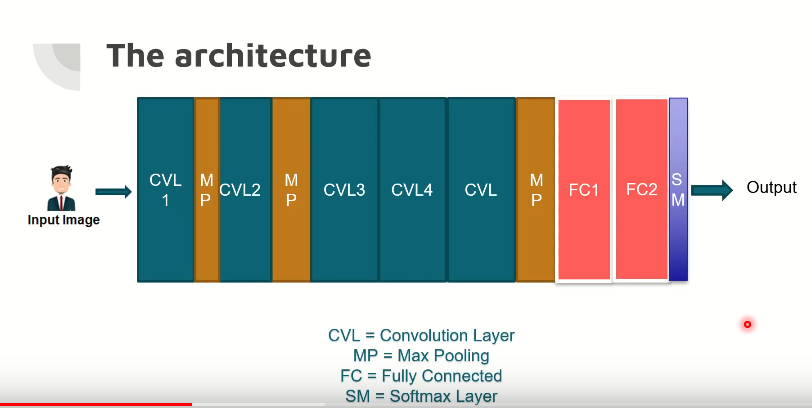

The below table is the constant hyper-parameters of the AlexNET.


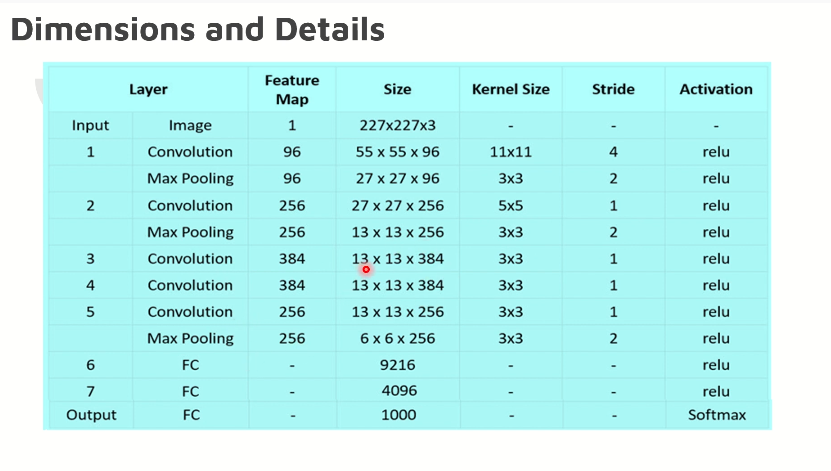

# Skeleton model

In [4]:
import keras
from keras.models import Sequential
# here keras.model is imported because our ANN will be in sequential nature.

from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
# Importing the required libraries for CNN ALexNet
# Dropout is a technique used to prevent model from overfitting

from tensorflow.keras.layers import BatchNormalization
# For normalization

import numpy as np

image_shape = (227,227,3)

np.random.seed(1000)
# Instantiate an empty model

model = Sequential()


In [6]:
# 1st Convolutional layer
model.add(Conv2D(filters=96, input_shape = image_shape, kernel_size = (11,11), strides = (4,4), padding ='valid'))
model.add(Activation('relu'))
# First layer has 96 filters, the input shape is 227 * 227 * 3
# Kernel size is 11*11, striding 4*4, ReLu is the activation function.

# Max Pooling
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding ='valid'))

# 2nd Convolutional layer
model.add(Conv2D(filters=256,kernel_size = (5,5), strides = (1,1), padding ='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding ='valid'))

# 3rd Convolutional layer
model.add(Conv2D(filters=384,kernel_size = (3,3), strides = (1,1), padding ='valid'))
model.add(Activation('relu'))

# 4th Convolutional layer
model.add(Conv2D(filters=384,kernel_size = (3,3), strides = (1,1), padding ='valid'))
model.add(Activation('relu'))

# 5th Convolutional layer
model.add(Conv2D(filters=256,kernel_size = (3,3), strides = (1,1), padding ='valid'))
model.add(Activation('relu'))

# Max pooling
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))


In [7]:
# Passing it to a fully connected layer, Here we do flatten!
model.add(Flatten())

# 1st Fully Connected layer has 4096
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully connected layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add dropout
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1000))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 23, 23, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                    